In [1]:
import numpy as np
import pandas as pd

In [20]:
df1=pd.read_csv(r'C:\Users\EDWIN\OneDrive\Documents\GitHub\Bird_Classification\Bird Species Classification Dataset\Dataset\training_set\training_set.csv')
df1.head()

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103


In [22]:
df2=pd.read_csv(r'C:\Users\EDWIN\OneDrive\Documents\GitHub\Bird_Classification\Bird Species Classification Dataset\Dataset\training_set\training_target.csv')
df2.head()

,ID,species
0,284,C
1,101,C
2,400,B
3,98,C
4,103,C


In [23]:
df2.isnull().sum()

ID         0
species    0
dtype: int64

In [24]:
merged_df=pd.merge(df1,df2,on="ID")
merged_df.head()

,bill_depth,bill_length,wing_length,location,mass,sex,ID,species
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284,C
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101,C
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400,B
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98,C
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103,C


In [25]:
merged_df.isnull().sum()

bill_depth       1
bill_length    140
wing_length    137
location        30
mass             2
sex             56
ID               0
species          0
dtype: int64

In [29]:
df_filled=merged_df.fillna(method='ffill')

C:\Users\EDWIN\AppData\Local\Temp\ipykernel_33956\3777071040.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled=merged_df.fillna(method='ffill')


In [30]:
df_filled.isnull().sum()

bill_depth     0
bill_length    0
wing_length    0
location       0
mass           0
sex            0
ID             0
species        0
dtype: int64

In [42]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_filled['location'] = encoder.fit_transform(df_filled[['location']])


In [43]:
label_encoder=LabelEncoder()
df_filled['species']=label_encoder.fit_transform(df_filled['species'])

In [44]:
df_filled.head()

,bill_depth,bill_length,wing_length,location,mass,sex,ID,species
0,14.300000,48.200000,210.000000,0.0,4600.0,0.0,284,2
1,14.400000,48.400000,203.000000,0.0,4625.0,0.0,101,2
2,18.400000,48.400000,200.000000,0.0,3400.0,0.0,400,1
3,14.982114,47.504878,200.000000,0.0,4800.0,0.0,98,2
4,18.982114,38.259307,217.186992,0.0,5200.0,0.0,103,2


In [50]:
df_filled.head()

,bill_depth,bill_length,wing_length,location,mass,sex,species
0,14.300000,48.200000,210.000000,0.0,4600.0,0.0,2
1,14.400000,48.400000,203.000000,0.0,4625.0,0.0,2
2,18.400000,48.400000,200.000000,0.0,3400.0,0.0,1
3,14.982114,47.504878,200.000000,0.0,4800.0,0.0,2
4,18.982114,38.259307,217.186992,0.0,5200.0,0.0,2


In [51]:
df=df_filled

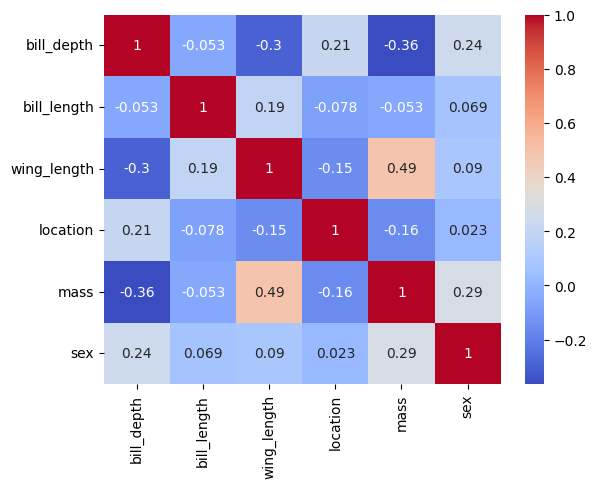

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [53]:
X =df.drop('species',axis=1)
y=df['species']

In [54]:
X,y

(     bill_depth  bill_length  wing_length  location    mass  sex
 0     14.300000    48.200000   210.000000       0.0  4600.0  0.0
 1     14.400000    48.400000   203.000000       0.0  4625.0  0.0
 2     18.400000    48.400000   200.000000       0.0  3400.0  0.0
 3     14.982114    47.504878   200.000000       0.0  4800.0  0.0
 4     18.982114    38.259307   217.186992       0.0  5200.0  0.0
 ..          ...          ...          ...       ...     ...  ...
 430   17.000000    48.833824   196.000000       0.0  3500.0  1.0
 431   17.100000    48.833824   193.000000       0.0  3400.0  0.0
 432   19.400000    48.833824   193.000000       1.0  3900.0  1.0
 433   16.600000    55.512336   187.000000       0.0  2900.0  1.0
 434   18.900000    55.512336   187.000000       0.0  4300.0  1.0
 
 [435 rows x 6 columns],
 0      2
 1      2
 2      1
 3      2
 4      2
       ..
 430    1
 431    0
 432    0
 433    1
 434    0
 Name: species, Length: 435, dtype: int32)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

rf=RandomForestClassifier()
model=rf.fit(X_train,y_train)

In [71]:
y_pred=model.predict(X_test)

In [75]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy={accuracy*100}")

Accuracy=91.6030534351145


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        53
           1       0.90      0.76      0.83        34
           2       1.00      1.00      1.00        44

    accuracy                           0.92       131
   macro avg       0.92      0.90      0.91       131
weighted avg       0.92      0.92      0.91       131

